# Sundanese Tweet Emotion Classification (NLP)
---




In this project, we decided to try an NLP Task (Emotion Classification).

This dataset contains tweet from Indonesia's second largest local language which is ***Sundanese***, and already labeled for the emotion.

There are 4 emotions in this dataset, which are :
1. **anger**
2. **joy**
3. **fear**
4. **sadness**

We will use Random Forest, Adaboost, and Xgboost as a baseline model in this project as comparison.

# Importing Dependencies and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/sundanese_twitter_dataset/data.csv')
df.head()

,label,data
0,anger,"sok geura leungit atuh sia teh corona, matak g..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ..."


As we can see here, the dataset only contains 2 features, which are :
1. label := for the emotion classification
2. data := the tweet in Sundanese

# Visualizing the Dataset

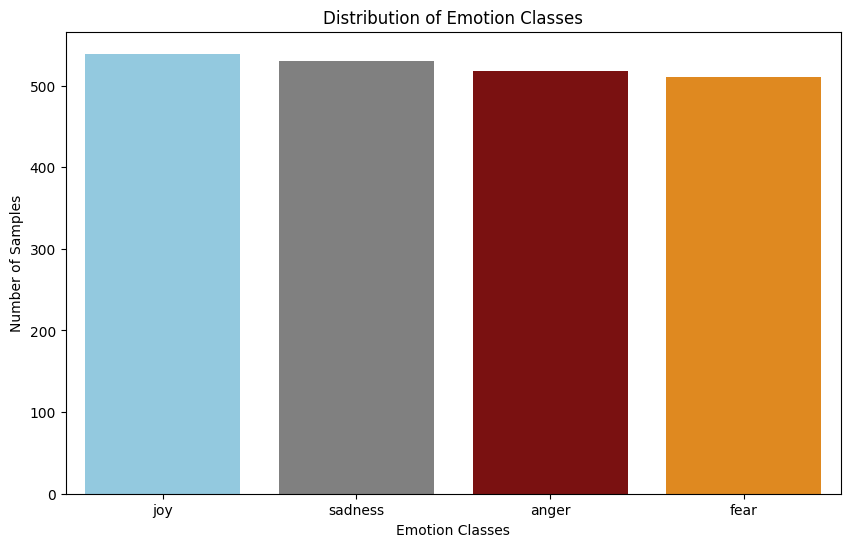

In [ ]:
emotion_colors = {
    'joy': 'skyblue',
    'sadness': 'grey',
    'anger': 'darkred',
    'fear' : 'darkorange'
}

# counts each classes
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=[emotion_colors[label] for label in label_counts.index])
plt.title('Distribution of Emotion Classes')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
print(label_counts)

joy        539
sadness    530
anger      518
fear       511
Name: label, dtype: int64


The dataset contains **2098** rows of data, and it looks equally distributed

# Data Preprocessing

## Lowercasing

In [ ]:
df['data'] = df['data'].str.lower()
df['data']

0       sok geura leungit atuh sia teh corona, matak g...
1       nu katoel katuhu nu nyerina kenca, goblog wasitna
2       bingah pisan patepang sareng pangerasa. sing k...
3       asa hariwang kieu.. lalakon hirup teh asa nyor...
4       orang mana sih anying, sampis pisan. bunuh ae ...
                              ...                        
2093       meuni ngeunah ngabarakatak eeeuy uiiiiing....!
2094    meuni ku endah, tebeda nami na gusti nu agung,...
2095    meuni bungah kieu euy meunang di ngalam, nuhun...
2096    meuni bingah ningalna ya alloh mudah" pas 02 k...
2097            meuni atoh ningali adi lanceuk guyub kitu
Name: data, Length: 2098, dtype: object

**Convert all text to lowercase**. This ensures consistency in the representation of words and helps the model generalize better by treating words in different cases as the same.

## Removing Punctuation and Special Characters

In [ ]:
import re
df['data'] = df['data'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['data']

0       sok geura leungit atuh sia teh corona matak ge...
1        nu katoel katuhu nu nyerina kenca goblog wasitna
2       bingah pisan patepang sareng pangerasa sing ka...
3       asa hariwang kieu lalakon hirup teh asa nyoran...
4       orang mana sih anying sampis pisan bunuh ae la...
                              ...                        
2093            meuni ngeunah ngabarakatak eeeuy uiiiiing
2094    meuni ku endah tebeda nami na gusti nu agung d...
2095    meuni bungah kieu euy meunang di ngalam nuhun ...
2096    meuni bingah ningalna ya alloh mudah pas  keng...
2097            meuni atoh ningali adi lanceuk guyub kitu
Name: data, Length: 2098, dtype: object

**Remove unnecessary punctuation and special characters** that might not contribute much to the meaning of the text.

## Tokenizing the words

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the 'data' column
df['data'] = df['data'].apply(word_tokenize)
df['data']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [sok, geura, leungit, atuh, sia, teh, corona, ...
1       [nu, katoel, katuhu, nu, nyerina, kenca, goblo...
2       [bingah, pisan, patepang, sareng, pangerasa, s...
3       [asa, hariwang, kieu, lalakon, hirup, teh, asa...
4       [orang, mana, sih, anying, sampis, pisan, bunu...
                              ...                        
2093      [meuni, ngeunah, ngabarakatak, eeeuy, uiiiiing]
2094    [meuni, ku, endah, tebeda, nami, na, gusti, nu...
2095    [meuni, bungah, kieu, euy, meunang, di, ngalam...
2096    [meuni, bingah, ningalna, ya, alloh, mudah, pa...
2097    [meuni, atoh, ningali, adi, lanceuk, guyub, kitu]
Name: data, Length: 2098, dtype: object

**Break the text into individual words or tokens**, to help convert raw text into a format that is suitable for analysis and model training.

## Removing stopwords

in this dataset that we've downloaded, it came with its own stopwords in seperated .txt file, which is written in **Sundanese**

In [ ]:
sundanese_stopwords = '/content/drive/MyDrive/Dataset/sundanese_twitter_dataset/stopwordv1.txt'

with open(sundanese_stopwords, 'r') as file:
    stopwords = set(file.read().splitlines())

# Function to remove custom stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stopwords]

# Apply the function to the 'data' column
df['data'] = df['data'].apply(remove_stopwords)
df['data']


0       [geura, leungit, sia, corona, gelo, yeuh, aing...
1       [katoel, katuhu, nyerina, kenca, goblog, wasitna]
2       [bingah, patepang, pangerasa, sing, katampi, k...
3                   [hariwang, lalakon, hirup, nyorangan]
4          [orang, sih, anying, sampis, bunuh, ae, bunuh]
                              ...                        
2093      [meuni, ngeunah, ngabarakatak, eeeuy, uiiiiing]
2094    [meuni, endah, tebeda, nami, gusti, agung, dim...
2095    [meuni, bungah, meunang, ngalam, nuhun, bahh, ...
2096    [meuni, bingah, ningalna, alloh, mudah, pas, k...
2097          [meuni, atoh, ningali, adi, lanceuk, guyub]
Name: data, Length: 2098, dtype: object

# Data Modelling

## Splitting the Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report


# Extract features and labels
X = df['data']
y = df['label']



## Inserting the splitted data into a model

### Random Forest

In [ ]:
# Create a pipeline with CountVectorizer and RandomForestClassifier
model = make_pipeline(CountVectorizer(analyzer=lambda x: x), RandomForestClassifier(random_state=42))

# Define a custom scorer for cross_val_score
custom_scorer = make_scorer(accuracy_score)

# Perform 5-fold cross-validation and get cross-validated predictions
cv_predicted_labels = cross_val_predict(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Display the comparison of actual vs predicted labels for each fold
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': cv_predicted_labels})

# Display the comparison
print("Actual vs Predicted Labels (Cross-Validation):")
print(comparison_df)

# Evaluate the model
accuracy = accuracy_score(y, cv_predicted_labels)
classification_report_str = classification_report(y, cv_predicted_labels)

# Display the evaluation metrics
print("\nModel Evaluation (Cross-Validation):")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Classification Report:")
print(classification_report_str)

Actual vs Predicted Labels (Cross-Validation):
     Actual Predicted
0     anger     anger
1     anger     anger
2       joy       joy
3      fear      fear
4     anger     anger
...     ...       ...
2093    joy       joy
2094    joy       joy
2095    joy       joy
2096    joy       joy
2097    joy       joy

[2098 rows x 2 columns]

Model Evaluation (Cross-Validation):
Accuracy: 92.80%
Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.93      0.93       518
        fear       0.89      0.96      0.92       511
         joy       0.98      0.92      0.95       539
     sadness       0.93      0.90      0.91       530

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098





###**Adaboost**



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
model = make_pipeline(CountVectorizer(analyzer=lambda x: x), AdaBoostClassifier(n_estimators=100))

# Perform 5-fold cross-validation
cv_predicted_labels = cross_val_predict(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

# Display the comparison of actual vs predicted labels for each fold
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': cv_predicted_labels})

# Display the comparison
print("Actual vs Predicted Labels (Cross-Validation):")
print(comparison_df)

# Evaluate the model
accuracy = accuracy_score(y, cv_predicted_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

classification_report_str = classification_report(y, cv_predicted_labels)
print("Classification Report:")
print(classification_report_str)

Actual vs Predicted Labels (Cross-Validation):
     Actual Predicted
0     anger     anger
1     anger     anger
2       joy       joy
3      fear      fear
4     anger     anger
...     ...       ...
2093    joy       joy
2094    joy   sadness
2095    joy       joy
2096    joy       joy
2097    joy       joy

[2098 rows x 2 columns]
Accuracy: 82.60%
Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.77      0.81       518
        fear       0.95      0.80      0.87       511
         joy       0.97      0.81      0.89       539
     sadness       0.65      0.92      0.76       530

    accuracy                           0.83      2098
   macro avg       0.86      0.83      0.83      2098
weighted avg       0.86      0.83      0.83      2098



###**Xgboost**

In [ ]:
from xgboost import XGBClassifier

# XGBoost model
model = make_pipeline(
    CountVectorizer(),
    XGBClassifier(n_estimators=100, learning_rate=0.1)
)

#because xgboost require numeric so we change the data a little bit
X_xg = df['data'].apply(lambda x: " ".join(x)).tolist()
label_map = {"anger": 0, "fear": 1, "joy": 2, "sadness": 3}
y_xg = y.map(label_map)

# Cross validation
cv_predicted = cross_val_predict(model, X_xg, y_xg, cv=5)

# Display the comparison of actual vs predicted labels for each fold
comparison_df = pd.DataFrame({'Actual': y_xg, 'Predicted': cv_predicted_labels})

# Display the comparison
print("Actual vs Predicted Labels (Cross-Validation):")
print(comparison_df)

# Evaluate model
accuracy = accuracy_score(y_xg, cv_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

report = classification_report(y_xg, cv_predicted)
print("Classification Report:")
print(report)

Actual vs Predicted Labels (Cross-Validation):
      Actual Predicted
0          0     anger
1          0     anger
2          2       joy
3          1      fear
4          0     anger
...      ...       ...
2093       2       joy
2094       2   sadness
2095       2       joy
2096       2       joy
2097       2       joy

[2098 rows x 2 columns]
Accuracy: 90.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       518
           1       0.98      0.89      0.93       511
           2       0.98      0.93      0.95       539
           3       0.78      0.94      0.86       530

    accuracy                           0.91      2098
   macro avg       0.92      0.91      0.91      2098
weighted avg       0.92      0.91      0.91      2098



#**Data Visualization**

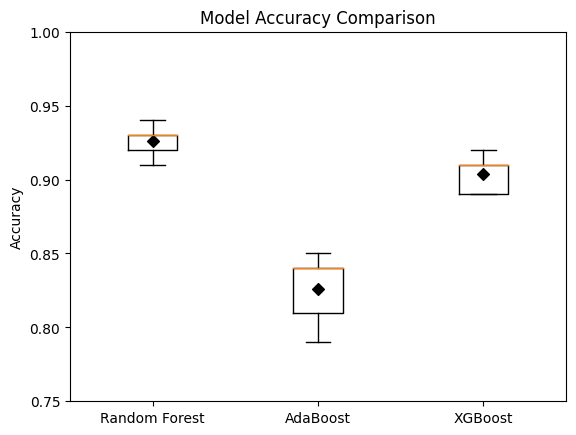

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample scores for each fold
rf_scores = [0.93, 0.94, 0.92, 0.91, 0.93]
ada_scores = [0.85, 0.79, 0.84, 0.81, 0.84]
xgb_scores = [0.92, 0.89, 0.91, 0.89, 0.91]

# Calculate means
rf_mean = np.mean(rf_scores)
ada_mean = np.mean(ada_scores)
xgb_mean = np.mean(xgb_scores)

fig, ax = plt.subplots()

# Create boxplots
ax.boxplot([rf_scores, ada_scores, xgb_scores], labels=['Random Forest', 'AdaBoost', 'XGBoost'])

# Add mean markers
ax.scatter([1, 2, 3], [rf_mean, ada_mean, xgb_mean], marker='D', color='black')

ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
ax.set_ylim(0.75, 1)

plt.show()

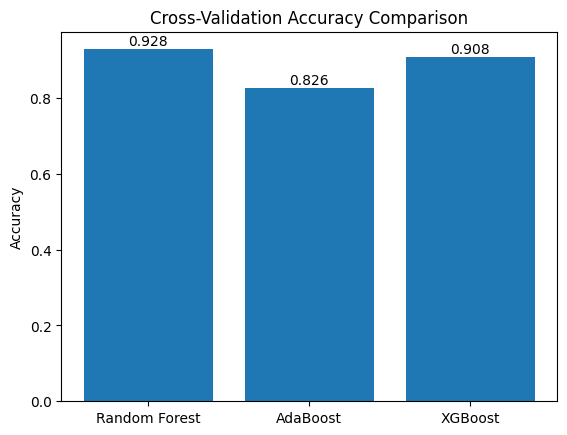

In [ ]:
import matplotlib.pyplot as plt

rf_score = 0.9280
ada_score = 0.8260
xgb_score = 0.9080

models = ['Random Forest', 'AdaBoost', 'XGBoost']
scores = [rf_score, ada_score, xgb_score]

fig, ax = plt.subplots()
ax.bar(models, scores)
ax.set_title("Cross-Validation Accuracy Comparison")
ax.set_ylabel("Accuracy")

for i, v in enumerate(scores):
    ax.text(i, v+0.01, str(round(v, 4)), ha='center')

plt.show()

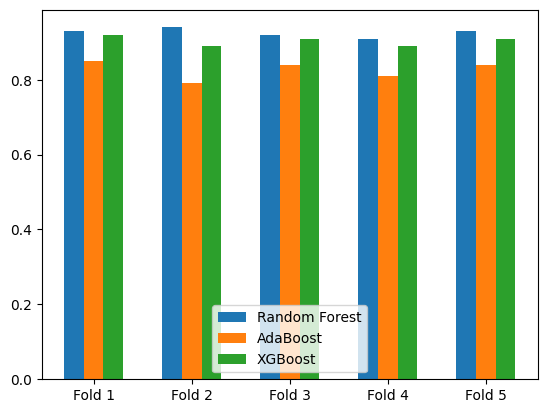

In [ ]:
import matplotlib.pyplot as plt

rf_scores = [0.93, 0.94, 0.92, 0.91, 0.93]
ada_scores = [0.85, 0.79, 0.84, 0.81, 0.84]
xgb_scores = [0.92, 0.89, 0.91, 0.89, 0.91]

x = np.arange(len(rf_scores))

fig, ax = plt.subplots()

ax.bar(x - 0.2, rf_scores, 0.2, label='Random Forest')
ax.bar(x, ada_scores, 0.2, label='AdaBoost')
ax.bar(x + 0.2, xgb_scores, 0.2, label='XGBoost')

ax.set_xticks(x)
ax.set_xticklabels(["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
ax.legend()

plt.show()

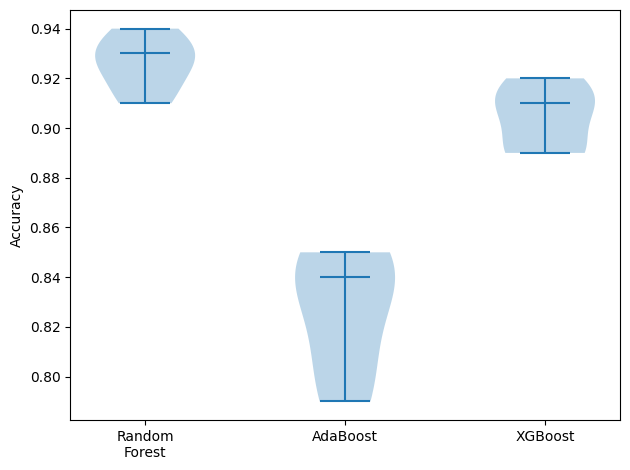

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rf_scores = [0.93, 0.94, 0.92, 0.91, 0.93]
ada_scores = [0.85, 0.79, 0.84, 0.81, 0.84]
xgb_scores = [0.92, 0.89, 0.91, 0.89, 0.91]

# Set up the figure
fig, ax = plt.subplots()

# Plot the violins
ax.violinplot([rf_scores, ada_scores, xgb_scores],
              showmeans=False,
              showmedians=True)

# Customize the ticks
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Random\nForest', 'AdaBoost', 'XGBoost'])
ax.set_ylabel('Accuracy')

# Final touches
plt.tight_layout()
plt.show()

#**Result & Analysis**


1. Random Forest
- Accuracy: 92.80%
- Precision: 0.92 - 0.98
- Recall: 0.90 - 0.93
- F1-Score: 0.91 - 0.95

Overall the Random Forest model demonstrated the best performance compared to the other models, with 92.80% accuracy on cross-validation. The precision, recall, and F1-score values were also highest and most stable among the three models.

2. AdaBoost
- Accuracy: 82.60%
- Precision: 0.65 - 0.97
- Recall: 0.77 - 0.92
- F1-Score: 0.76 - 0.89

The performance of AdaBoost was slightly lower than Random Forest, with 82.60% accuracy. The evaluation metrics were also more varied across emotion classes.

3. XGBoost
- Accuracy: 90.80%
- Precision: 0.78 - 0.98
- Recall: 0.87 - 0.94
- F1-Score: 0.86 - 0.95

XGBoost demonstrated performance in between Random Forest and AdaBoost. Its accuracy was quite high at 90.80%, but other metrics were slightly more varied across emotion classes.

Overall, Random Forest showed the best and most stable results on this Sundanese tweet dataset. But XGBoost was also competitive with only around 2% difference in accuracy from Random Forest.